### Importing libraries and loading data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("merged_data_after_dummies.csv")
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,...,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,Age,Ethnicity_Bengali,Ethnicity_English,Ethnicity_Han Chinese,Gender_F,Gender_M
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,...,33228.0,8293.0,0.0,0.0,25,0,0,1,0,1
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,...,5293.0,2740.0,0.0,0.0,25,0,0,1,0,1
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,...,57243.0,25354.0,0.0,0.0,25,0,0,1,0,1
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,...,49960.0,33932.0,0.0,0.0,25,0,0,1,0,1
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,...,44790.0,29749.0,0.0,0.0,25,0,0,1,0,1


### Feature selection

In [5]:
X = df.drop(columns=["Age","Ethnicity_Bengali","Ethnicity_English","Ethnicity_Han Chinese","Gender_F","Gender_M","user-definedlabeln"],axis=1)
y = df["user-definedlabeln"]

In [6]:
X.shape,y.shape

((12811, 14), (12811,))

### Splitting training and test data

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2)

In [8]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((10248, 14), (2563, 14), (10248,), (2563,))

### Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

In [10]:
log_reg.score(X_test,y_test)

0.5887631681623098

In [11]:
lr_ypreds = log_reg.predict(X_test)
lr_ypreds,len(lr_ypreds)

(array([1., 0., 1., ..., 1., 1., 1.]), 2563)

### Confusion Matrix

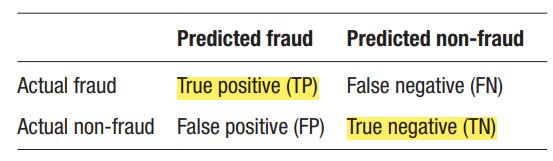

<Figure size 800x800 with 0 Axes>

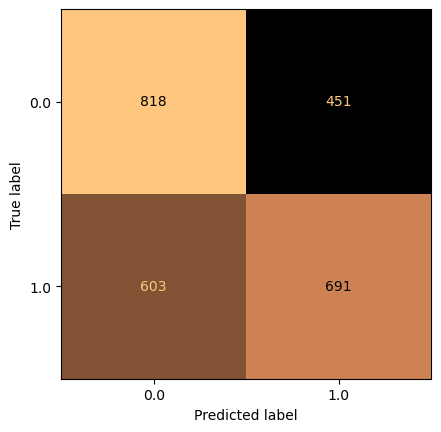

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize=(8,8))

ConfusionMatrixDisplay.from_predictions(y_test,lr_ypreds,colorbar=False,cmap="copper");

### Cross validation 

In [13]:
from sklearn.model_selection import cross_val_score

cross_validated_score = cross_val_score(log_reg,X,y,cv=5,scoring=None)
cross_validated_score

array([0.53843153, 0.58157689, 0.59133489, 0.60655738, 0.57025761])

In [14]:
print("5 fold Cross validated accuracy of Logistic regression is : ",round(cross_validated_score.mean()*100,2),"%")

5 fold Cross validated accuracy of Logistic regression is :  57.76 %


### Hyperparameter tuning 

In [20]:
from sklearn.model_selection import RandomizedSearchCV

params = {"C":[1.0],
          "class_weight" : [None,'balanced'], 
          "dual" :[False,True], 
          "fit_intercept" : [True,False],
          "intercept_scaling" : [1], 
          "max_iter" : [1000,1500],
          "multi_class" : ['auto','multinomial'], 
          "penalty": ['l2','elasticnet'], 
          "random_state" : [None], 
          "solver" : ['liblinear','lbfgs'],
          "warm_start" :[False]
         }

In [21]:
l2 = LogisticRegression(n_jobs=1)

l2_classifier = RandomizedSearchCV(estimator=l2,
                             param_distributions=params,
                             n_jobs=1,
                             cv=5,
                             verbose=True)

l2_classifier.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

RandomizedSearchCV(cv=5, estimator=LogisticRegression(n_jobs=1), n_jobs=1,
                   param_distributions={'C': [1.0],
                                        'class_weight': [None, 'balanced'],
                                        'dual': [False, True],
                                        'fit_intercept': [True, False],
                                        'intercept_scaling': [1],
                                        'max_iter': [1000, 1500],
                                        'multi_class': ['auto', 'multinomial'],
                                        'penalty': ['l2', 'elasticnet'],
                                        'random_state': [None],
                                        'solver': ['liblinear', 'lbfgs'],
                                        'warm_start': [False]},
                   verbose=True)

In [22]:
l2_classifier.best_params_

{'warm_start': False,
 'solver': 'liblinear',
 'random_state': None,
 'penalty': 'l2',
 'multi_class': 'auto',
 'max_iter': 1000,
 'intercept_scaling': 1,
 'fit_intercept': True,
 'dual': True,
 'class_weight': None,
 'C': 1.0}

In [23]:
l2_classifier.score(X_test,y_test)

0.48614904408895826

In [24]:
print("Accuracy of Logistic regression after Hyperparameter tuning : ",round(l2_classifier.score(X_test,y_test)*100,2),"%")

Accuracy of Logistic regression after Hyperparameter tuning :  48.61 %


In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test,lr_ypreds))

              precision    recall  f1-score   support

         0.0       0.58      0.64      0.61      1269
         1.0       0.61      0.53      0.57      1294

    accuracy                           0.59      2563
   macro avg       0.59      0.59      0.59      2563
weighted avg       0.59      0.59      0.59      2563



• Precision or positive predicted value = TP / (TP + FP)

• Recall = TP / (TP+FN)

• Accuracy = (TP + TN) / (TP + FN + FP + TN)

• F1 score = 2TP/ (2TP + FP + FN